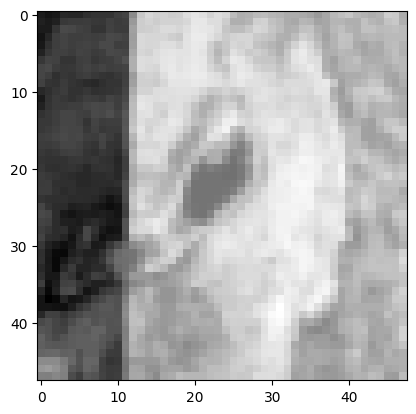

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import KFold

# Load Biomes data
inputFile = open('../data/raw/biomas.obj', 'rb')
data = pickle.load(inputFile)

processed_images = data['Images']
labels = data['Labels']

processed_images = np.array(processed_images)
labels = np.array(labels)

# Plot one image
plt.imshow(processed_images[200], cmap='gray')
plt.show()

img_rows, img_cols = processed_images.shape[1], processed_images.shape[2]

processed_images = processed_images.reshape(processed_images.shape[0], img_rows, img_cols, 1)

processed_images = processed_images.astype('float32') / 255.

num_classes = len(np.unique(labels))

labels_categorical = to_categorical(labels, num_classes)

def create_model():
    model = Sequential()

    model.add(Conv2D(60, kernel_size=(5, 5), activation='relu', input_shape=(img_rows, img_cols, 1)))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
    model.add(Conv2D(30, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))
    model.add(Flatten())

    model.add(Dense(70, activation='relu'))
    model.add(Dense(70, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model


In [9]:

# DEFINIMOS CROSS VALIDATION
kf = KFold(n_splits=2, shuffle=True, random_state=42)

fold_accuracies = []

for train_index, test_index in kf.split(processed_images):
    x_train, x_test = processed_images[train_index], processed_images[test_index]
    y_train, y_test = labels_categorical[train_index], labels_categorical[test_index]

    model = create_model()

    # DEFINIMOS EL MODELO
    model.fit(x_train, y_train, epochs=150, batch_size=128, verbose=1)

    y_pred = np.argmax(model.predict(x_test), axis=-1)
    y_test_labels = np.argmax(y_test, axis=-1)

    accuracy = accuracy_score(y_test_labels, y_pred)
    fold_accuracies.append(accuracy)

    print(f"Exactitud del pliegue: {accuracy}")
    print(classification_report(y_test_labels, y_pred, target_names=[str(i) for i in range(num_classes)]))

print(f"Exactitud promedio con CV: {np.mean(fold_accuracies)}")

Epoch 1/150


c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.1929 - loss: 1.7866
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.1741 - loss: 1.7602
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.2314 - loss: 1.6735
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.2877 - loss: 1.5959
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.3476 - loss: 1.4847
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.3576 - loss: 1.4707
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.3916 - loss: 1.3849
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.4011 - loss: 1.3612
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.4222 - loss: 1.3624
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.4750 - loss: 1.2395
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.4641 - loss: 1.2454
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.4884 - lo

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - accuracy: 0.1644 - loss: 1.7737
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.2327 - loss: 1.7650
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.2243 - loss: 1.7088
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.3553 - loss: 1.5515
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.3521 - loss: 1.4879
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.3587 - loss: 1.4130
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.4248 - loss: 1.3246
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.4232 - loss: 1.3685
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.4264 - loss: 1.3849
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.4621 - loss: 1.2905
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.4788 - loss: 1.2690
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.5004 - lo